# CPSL Ground Vehicle Dataset Generation

In [64]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#location of the Deepsense6G dataset we wish to process
scenario_folder = "/data/david/CPSL_Ground/dataset_10Hz/"

#location that we wish to save the dataset to
dataset_folder = "/data/david/CPSL_Ground/dataset_10Hz/generated_dataset/"
sample_idx = 2

#specifying the names for the files
file_name = "frame"

radar_data_folder = "radar"
lidar_data_folder = "lidar"

Fetch scenario CSV and load Dataframe

In [65]:
dataframe = pd.DataFrame()
dataframe["radar"] = [os.path.join(radar_data_folder,file) for file in sorted(os.listdir(os.path.join(scenario_folder,radar_data_folder)))]
dataframe["lidar"] = [os.path.join(lidar_data_folder,file) for file in sorted(os.listdir(os.path.join(scenario_folder,lidar_data_folder)))]

## Camera Data - Not configured on CPSL Ground Vehicle at this time

In [66]:
# img_rel_paths = dataframe['unit1_rgb5'].values

# #create the figure
# fig,ax = plt.subplots()

# #get path to image
# img_abs_path = os.path.join(scenario_folder, img_rel_paths[sample_idx])

# #plot the rgb camera image
# img = plt.imread(img_abs_path)
# ax.imshow(img)
# ax.set_title(f'Sample {sample_idx}')
# ax.get_yaxis().set_visible(False)
# ax.get_xaxis().set_visible(False)

Radar Data

max range: 8.5654988m
num actual angle bins: 48


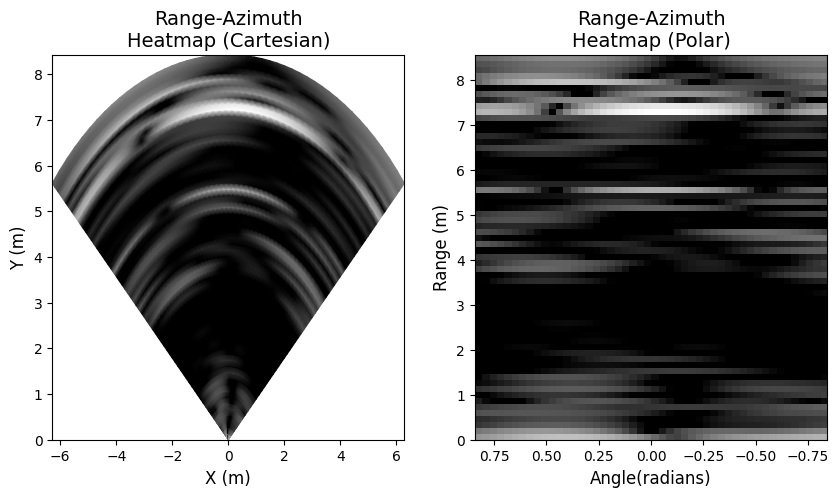

In [67]:
from Radar_Data_Processor import RadarDataProcessor

#initialize the radar
#initialize a raw data processor
radar_data_processor = RadarDataProcessor()
radar_data_processor.configure(
    scenario_data_path=scenario_folder,
    radar_rel_paths= dataframe["radar"].values,
    save_file_folder= os.path.join(dataset_folder,radar_data_folder),
    save_file_name=file_name,
    max_range_bin=64,
    num_chirps_to_save=40,
    radar_fov= [-0.87, 0.87], #+/- 50 degrees
    num_angle_bins=64,
    power_range_dB=[60,105],
    chirps_per_frame= 64,
    rx_channels = 4,
    tx_channels = 1,
    samples_per_chirp = 64,
    adc_sample_rate_Hz = 2e6,
    chirp_slope_MHz_us= 35,
    start_freq_Hz=77e9,
    idle_time_us = 100,
    ramp_end_time_us = 100
)

radar_data_processor.plot_range_azimuth_response(sample_idx)


In [68]:
import warnings
warnings.filterwarnings('ignore')
#save the generated responses to a file
radar_data_processor.generate_and_save_all_grids()

100%|██████████| 717/717 [00:07<00:00, 95.42it/s]


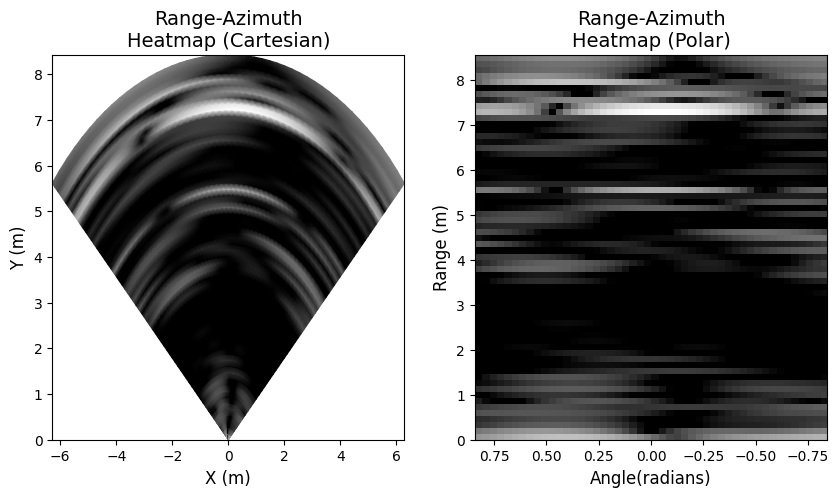

In [69]:
#plot a response from a previously saved file
radar_data_processor.plot_from_saved_range_azimuth_response(sample_idx)

Lidar Data

plot the filtered lidar point cloud in cartesian coordinates

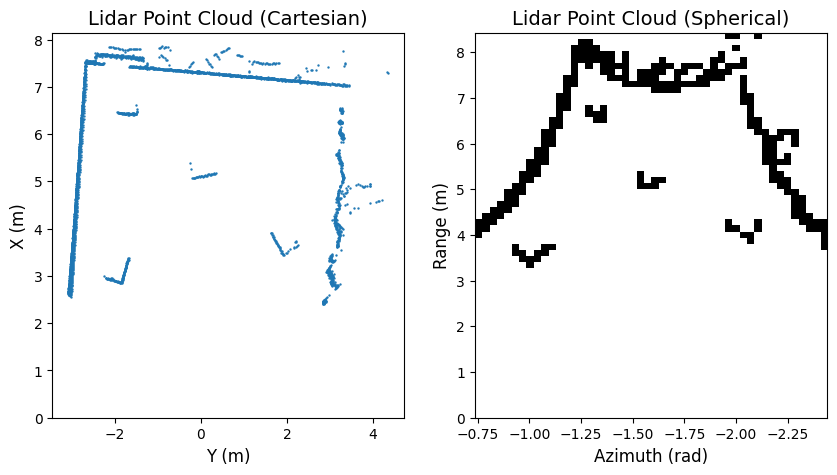

In [70]:
#custom point cloud importation
from Lidar_Data_Processor import LidarDataProcessor

lidar_data_processor = LidarDataProcessor()
lidar_data_processor.configure(
    scenario_data_path=scenario_folder,
    relative_paths=dataframe['lidar'].values,
    save_file_folder= os.path.join(dataset_folder,lidar_data_folder),
    save_file_name=file_name,
    max_range_m=8.56,
    num_range_bins=64,
    angle_range_rad=[-np.pi/2 - 0.87,-np.pi/2 + 0.87], #[-np.pi /2 , np.pi /2],
    num_angle_bins=48
)

lidar_data_processor.plot_pointcloud(sample_idx)

In [71]:
import warnings
warnings.filterwarnings('ignore')
#process and save all of the lidar data
lidar_data_processor.generate_and_save_all_grids()

100%|██████████| 717/717 [00:09<00:00, 71.92it/s]


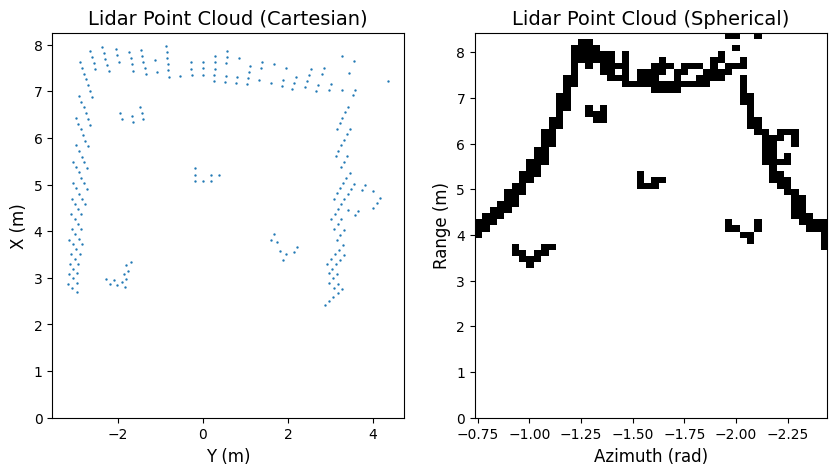

In [72]:
#load the grid from the file and diplay it
lidar_data_processor.plot_from_saved_grid(sample_idx)

lidar_data = lidar_data_processor.load_grid_from_file(sample_idx)